# Cahn Hilliard Equation by Finite Difference Method 
The Cahn Hilliard equation can be written as :

> ### $ \frac{\partial c}{\partial t} = \frac{M}{N_{v}} [ \nabla^2 \frac{\partial f_{o}}{\partial c} - 2\kappa (\frac{\partial ^4 c}{\partial x^4})] $

where 

> ### $\frac{\partial f_{o}}{\partial c}$ is assumed as a function of g(c) = 2Ac(1-c)(1-2c)

Now if we apply the Finite Scheme Method on the above equation we get : 

> ### $ c_{i}^{t + \Delta t} = c_{i}^{t} + \tilde {D} \frac{\Delta t}{(\Delta x)^2} ( g_{i+1}^{t} - 2g{i}^{t} + g_{i-1}^{t}) - 2\kappa \frac {\Delta t}{(\Delta x)^4} (c_{ww} -4c_{w} + 6c_{i} - 4c_{e} + c_{ee}) $ 

We'll assume $\beta 1$ and $\beta 2$ respectively as 

> $ \beta 1 = \tilde {D} \frac{\Delta t}{(\Delta x)^2} $

> $ \beta 2 = 2\kappa \frac {\Delta t}{(\Delta x)^4} $ 

All the constant parameters are assumed to be non-dimensionalised quantities. 


In [4]:
# ------ importing libraries ------ #
import numpy as np
from matplotlib import pyplot as plt 

In [5]:
# ------ defining parameters ------ #

dt = 0.001 # time step
dx = 1.0 # grid size
D = 1.0 # non-dimensioanlized diffusivity
kappa = 1.0 

beta1 = D * dt / dx ** 2
beta2 = 2 * kappa * dt / dx ** 4

n = 32 # size of the system
N = 40000 # number of timesteps 
m = 1.0 # wavelength 

Text(0.5, 1.0, 'C vs X Profile')

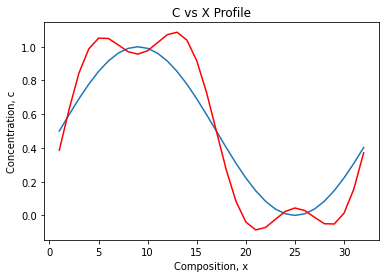

In [6]:
# ------ defining composition & concentration profiles ------ #

x = np.zeros((n,1)) # composition vector

for i in range (0,n) :
    x[i][0] = i + 1
    
oldc = np.zeros((n,1)) # concentration vector in t time
newc = np.zeros((n,1)) # concentration vector in t + del t time

for i in range (0, n) : # initial sinusoidal profile
    oldc[i][0] = 0.5 * ( 1 + np.sin(2 * np.pi * m * i * dx / n))

# plotting the initial profile 
plt.plot(x, oldc) 

# ------ calculating the non-linar part ------ #
g = np.zeros((n,1))
A = 1.0
for i in range (0, n) :
    g[i][0] = 2 * A * oldc[i][0] * ( 1 - oldc[i][0]) * (1 - 2 * oldc[i][0])

# ------ updation - loops ------ #

for j in range (0, N) : # starting the time-loop
    # starting loop over nodal points to calculate new c
    for i in range (0,n) : 
        # implementing the periodic boundary condition
        w = i - 1
        e = i + 1 
        ww = i - 2
        ee = i + 2 
        if (ww < 1) :
            ww = ww + n-1
        if (w < 1) :
            w = w + n-1
        if (ee  > n - 1) :
            ee = ee - n + 1 
        if (e  > n - 1 ) :
            e = e - n + 1
        # implementation of discretized CH equation
        newc[i][0] = oldc[i][0] + beta1 * (g[w][0] - 2 * g[i][0] + g[e][0]) - beta2 * (oldc[ww][0] - 4 * oldc[w][0] + 6 * oldc[i][0] - 4 * oldc[e][0] + oldc[ee][0])
    # updating the profile
    for k in range (0,n) :
        oldc[k][0] = newc[k][0]

# plotting the final profile 
plt.plot (x, oldc, color = "red") 
plt.xlabel ("Composition, x")
plt.ylabel ("Concentration, c")
plt.title ("C vs X Profile")

So as we can see the initial profile we started with is the sinusoidal profile, denoted by the blue curve. 

In the case of Cahn - Hilliard, the curve goes up. If we increase the number of timesteps it'll equilibrate , becoming a square curve going from 1 to -1.

This is the problem with Finite Difference Method, we are restricted to take dt = 0.001 causing accuracy problems because of accumulation of higher amount of errors due to discretization. 